This is a demostration program in comparing linear matching and dp matching.
The program first displays the visualization of simple data,
then it starts linear matching and display the linear matching result,
then the dp matching starts and the result will be displayed.
Second, it displays the visualization of sample data,
then same as above, the linear matching and dp macthing result.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
def read_data(filename,sep='\t'):
    data_ori = pd.read_csv(filename,sep = sep,header=None,names=np.arange(6),skiprows=1)
    data_xy = data_ori.values[:,:3]
    data = []
    count = 0
    if np.all(data_xy>0):
        data.append(data_xy)
    else:
        for idx,row in enumerate(data_xy):
            if np.any(row<0):
                data.append(data_xy[count:idx])
                count = idx+1
    return data

def stack_data(data):
    stacks = data[0]
    if len(data)>1:
        for stroke in data[1:]:
            new_stack = np.vstack((stacks,stroke))
            stacks = new_stack
    return stacks

def plot_data(data1,data2,dis=None,pairs=None,title = ''):
    if type(data1) == list and type(data2) == list:
        data1 = stack_data(data1)
        data2 = stack_data(data2)
        
    fig,ax = plt.subplots(1,1,figsize=(16,9))
    fig.suptitle(title)
    if dis:
        ax.set_title(f'Character Distance : {dis}')
    for p1,p2 in zip(data1[0:-1],data1[1:]):
        ax.plot([p1[0],p2[0]],[p1[1],p2[1]],c='b',linewidth=(p1[2]+p2[2])/200)
    for p1,p2 in zip(data2[0:-1],data2[1:]):
        ax.plot([p1[0],p2[0]],[p1[1],p2[1]],c='r',linewidth=(p1[2]+p2[2])/200)
    if pairs:
        for pair in pairs:
            ax.plot([pair[0][0],pair[1][0]],[pair[0][1],pair[1][1]],c='g',linestyle='dashed') #loosely dotted (0,(1,10))
    
    ax.invert_yaxis()
    plt.show()


def linear_d(stroke1,stroke2):
    stroke_l = max(stroke1[:,:-1],stroke2[:,:-1],key=len)
    stroke_s = min(stroke1[:,:-1],stroke2[:,:-1],key=len)
    len_l = len(stroke_l)
    len_s = len(stroke_s)
    ratio = len_l/len_s
    dis = np.zeros(len_s)
    pairs = []
    for j,ps in enumerate(stroke_s):
        match_idx = int(int(j*ratio*10**0+0.5)/10**0)  # int(x * (10 保留位数方 （0->1->int，1->10->x.1）)+0.5)/保留位数 -> float 
        if match_idx > (len_l-1):
            match_idx = len_l-1
        dis[j] = np.linalg.norm(ps-stroke_l[match_idx])
        pairs.append((ps,stroke_l[match_idx]))
    return np.mean(dis),pairs

def linear_matching(data1,data2):
    dis = 0
    pairs = []
    for i in range(len(data1)):
        d,p = linear_d(data1[i],data2[i])
        dis += d
        pairs += p
    return dis,pairs

def D_matrix(stroke1,stroke2):
    d = np.zeros((len(stroke1),len(stroke2)))
    for i,p1 in enumerate(stroke1[:,:-1]):
        for j,p2 in enumerate(stroke2[:,:-1]):
            d[i][j] = np.linalg.norm(p1-p2)
    
    return d

def back_tracking(g):
    g_r = g.shape[0]
    g_c = g.shape[1]
    pairs = np.zeros((g_r,2),dtype=np.int64)
    pairs[-1] = g_r-1,g_c-1
    j = g_c-1
    
    for i in range(g_r-1,-1,-1):
        if i==0:
            break
        if j == 1:
            idx = np.argmin([g[i-1][j],g[i-1][j-1]])
        if j == 0:
            idx = 0
        else:
            idx = np.argmin([g[i-1][j],g[i-1][j-1],g[i-1][j-2]])
            
        if idx == 0:
            pairs[i-1] = i-1,j
        if idx == 1:
            pairs[i-1] = i-1,j-1
            j -= 1
        if idx == 2:
            pairs[i-1] = i-1,j-2
            j -= 2
    return pairs

def DP_matching(data1,data2):
    pairs = []
    dis = 0
    for stroke1,stroke2 in zip(data1,data2):
        stroke_l = max(stroke1[:,:-1],stroke2[:,:-1],key=len)
        stroke_s = min(stroke1[:,:-1],stroke2[:,:-1],key=len)
        d = D_matrix(stroke_s,stroke_l)
        g = np.zeros(d.shape)
        for i in range(g.shape[0]):
            for j in range(g.shape[1]):
                if i == 0:
                    g[i][j] = d[i][j]
                if j == 1:
                    g[i][j] = min(g[i-1][j],g[i-1][j-1])+d[i][j]
                else:
                    g[i][j] = min(g[i-1][j],g[i-1][j-1],g[i-1][j-2])+d[i][j]
        dis += g[-1][-1]/g.shape[0]            
        pair = back_tracking(g)
        for row in pair:
            pairs.append([stroke_s[row[0]],stroke_l[row[1]]])
        
    return pairs,dis

running matching on simple data..
Linear Matching on Simple Data completed with 0.0 seconds
DP Matching on Simple Data completed with 0.054811954498291016 seconds


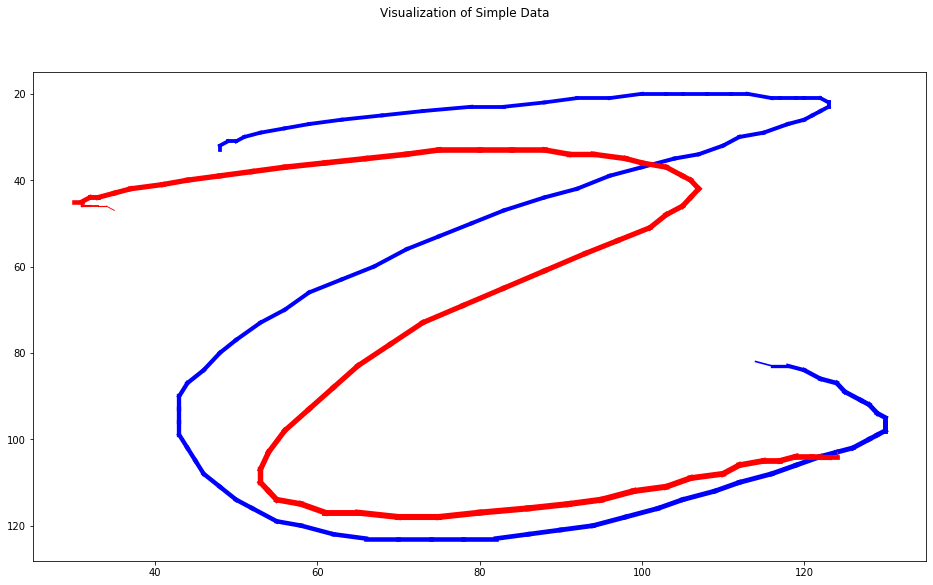

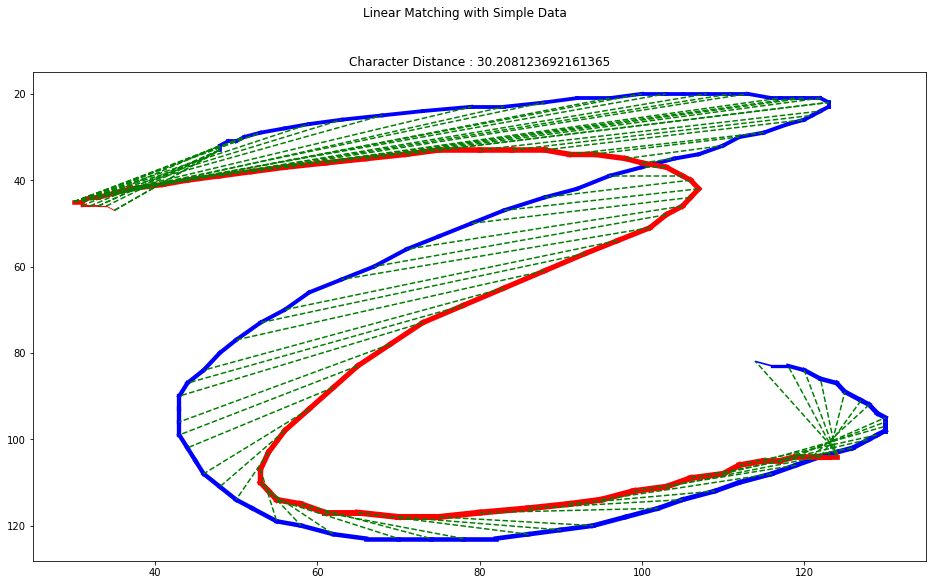

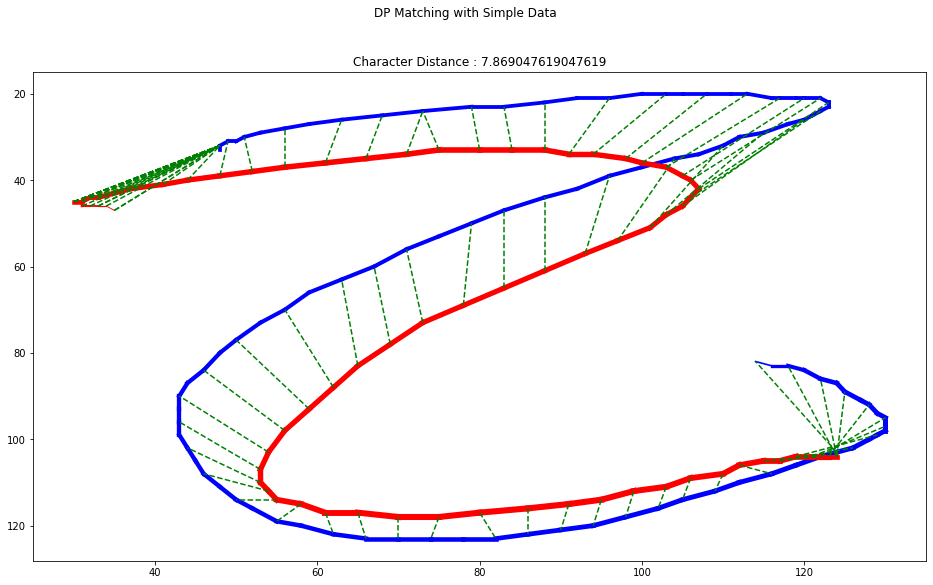

Linear Matching on Sample Data completed with 0.00498199462890625 seconds
DP Matching on Sample Data completed with 0.11775946617126465 seconds


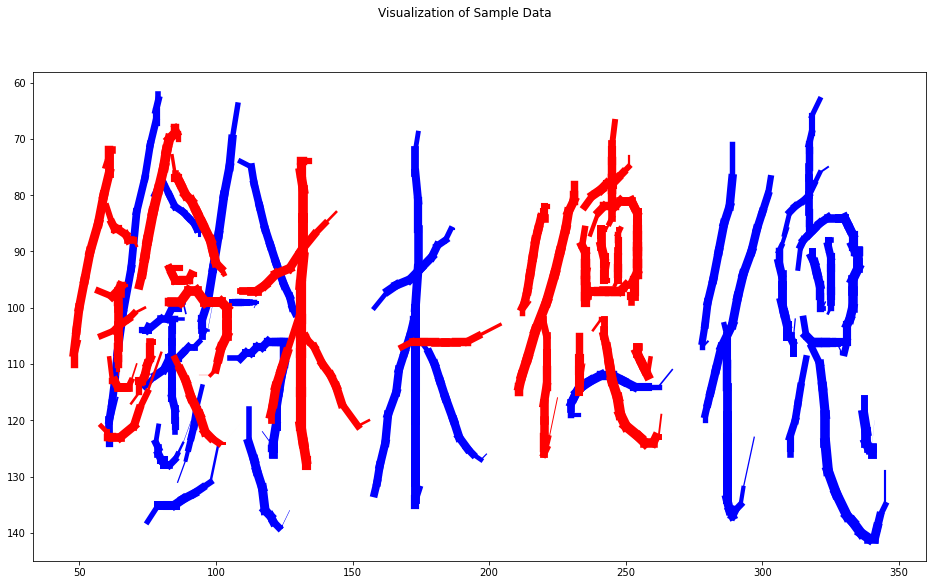

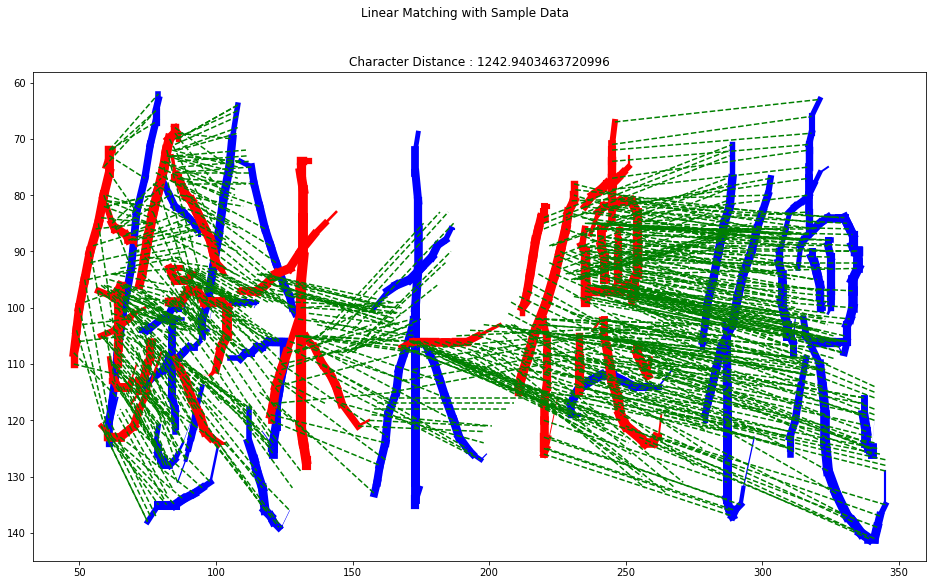

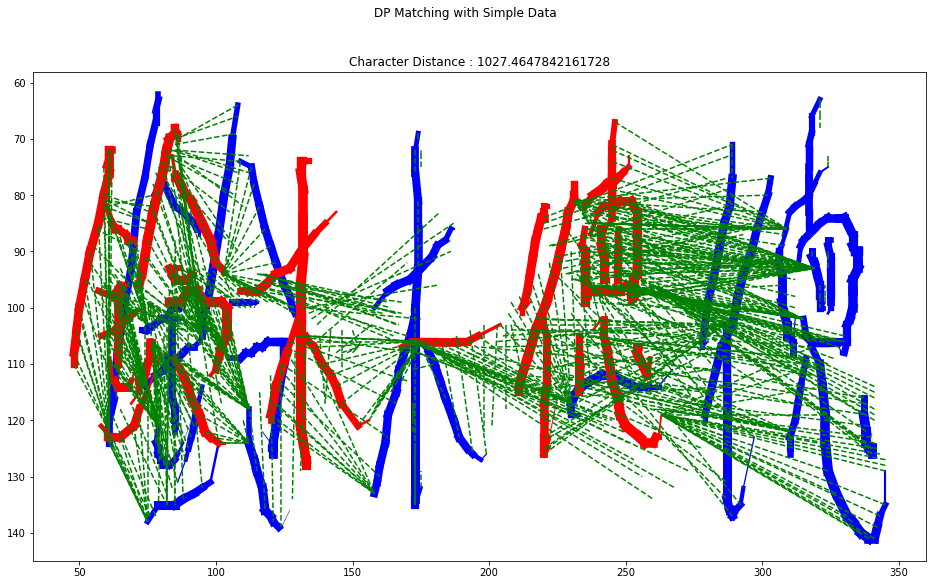

done


In [3]:
if __name__ == '__main__':
    print('running matching on simple data..')
    filename_ref = './data/simple/ref.sdt'
    filename_test = './data/simple/test.sdt'
    data_ref = read_data(filename_ref)
    data_test = read_data(filename_test)
    
    s_time = time.time()
    dis_l,pairs_l = linear_matching(data_ref,data_test)
    e_time = time.time()
    print(f'Linear Matching on Simple Data completed with {e_time-s_time} seconds')
    print(f'Character Distance {dis_l}')
    
    s_time = time.time()
    dppairs,dpdis = DP_matching(data_ref,data_test)
    e_time = time.time()
    print(f'DP Matching on Simple Data completed with {e_time-s_time} seconds')
    print(f'Character Distance {dpdis}')
    
    plot_data(data_ref,data_test,title='Visualization of Simple Data')
    plot_data(data_ref,data_test,dis_l,pairs_l,title='Linear Matching with Simple Data')
    plot_data(data_ref,data_test,dpdis,dppairs,title='DP Matching with Simple Data')
    
    sample1 ='./data/sample/001.001.000.sdt'
    sample2 ='./data/sample/001.001.001.sdt'
    s1 =read_data(sample1,sep=' ')
    s2 =read_data(sample2,sep=' ')
    
    s_time = time.time()
    dis_l2,pairs_l2 = linear_matching(s1,s2)
    e_time = time.time()
    print(f'Linear Matching on Sample Data completed with {e_time-s_time} seconds')
    print(f'Character Distance {dis_l2}')
    
    s_time = time.time()
    dppairs2,dpdis2 = DP_matching(s1,s2)
    e_time = time.time()
    print(f'DP Matching on Sample Data completed with {e_time-s_time} seconds')
    print(f'Character Distance {dpdis2}')
    
    plot_data(s1,s2,title='Visualization of Sample Data')
    plot_data(s1,s2,dis_l2,pairs_l2,title='Linear Matching with Sample Data')
    plot_data(s1,s2,dpdis2,dppairs2,title='DP Matching with Sample Data')
    
    print('done')